In [1]:
import math
import json 
from collections import defaultdict, Counter
import csv

import numpy as np
import pandas as pd
import statsmodels.api as sma
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu,ttest_ind

In [2]:
df = pd.read_csv('data/words_features.csv')

similarities = [
    'similarities.fasttext',
    'similarities.bert_context_last_layer',
    'similarities.bert_standalone',
    'similarities.bert_vulic',
    'similarities.clip_context_avg',
    'similarities.clip_standalone',
    'similarities.mbert_context_last_layer',
    'similarities.mbert_standalone', 
    'similarities.mbert_vulic', 
    'similarities.mclip_context_avg', 
    'similarities.mclip_standalone', 
    'similarities.openclip_context_avg', 
    'similarities.openclip_standalone', 
    'similarities.xlmr_context_last_layer', 
    'similarities.xlmr_standalone', 
    'similarities.xlmr_vulic'
]

real_factors = [
    "word1.attrs.abstractness",
    "word2.attrs.abstractness",
    "word1_count",
    "word2_count",
    "word1.attrs.vad.v",
    "word2.attrs.vad.v",
    "word1.attrs.vad.a",
    "word2.attrs.vad.a",
    "word1.attrs.vad.d",
    "word2.attrs.vad.d",
]

bool_factors = [
    "relations.wordnet.flag_antonyms",
    "relations.wordnet.flag_synonyms",
    "relations.wordnet.flag_same_hyponyms",
    "relations.wordnet.flag_same_hypernyms",
    "relations.wordnet.flag_hyponyms",
    "relations.wordnet.flag_hypernyms",
    'relations.conceptnet.flag_Antonym',
    'relations.conceptnet.flag_AtLocation',
    'relations.conceptnet.flag_DerivedFrom',
    'relations.conceptnet.flag_DistinctFrom',
    'relations.conceptnet.flag_FormOf',
    'relations.conceptnet.flag_IsA',
    'relations.conceptnet.flag_PartOf',
    'relations.conceptnet.flag_RelatedTo',
    'relations.conceptnet.flag_SimilarTo',
    'relations.conceptnet.flag_Synonym',
    'word1.attrs.supersenses.is_artifact',
    'word1.attrs.supersenses.is_event',
    'word1.attrs.supersenses.is_group',
    'word1.attrs.supersenses.is_process',
    'word1.attrs.supersenses.is_animal',
    'word1.attrs.supersenses.is_state',
    'word1.attrs.supersenses.is_food',
    'word1.attrs.supersenses.is_substance',
    'word1.attrs.supersenses.is_phenomenon',
    'word1.attrs.supersenses.is_location',
    'word1.attrs.supersenses.is_time',
    'word1.attrs.supersenses.is_communication',
    'word1.attrs.supersenses.is_feeling',
    'word1.attrs.supersenses.is_quantity',
    'word1.attrs.supersenses.is_possession',
    'word1.attrs.supersenses.is_cognition',
    'word1.attrs.supersenses.is_act',
    'word1.attrs.supersenses.is_object',
    'word1.attrs.supersenses.is_shape',
    'word1.attrs.supersenses.is_relation',
    'word1.attrs.supersenses.is_plant',
    'word1.attrs.supersenses.is_Tops',
    'word1.attrs.supersenses.is_attribute',
    'word1.attrs.supersenses.is_body',
    'word1.attrs.supersenses.is_person',
    'word1.attrs.supersenses.is_motive',
    'word2.attrs.supersenses.is_artifact',
    'word2.attrs.supersenses.is_event',
    'word2.attrs.supersenses.is_group',
    'word2.attrs.supersenses.is_process',
    'word2.attrs.supersenses.is_animal',
    'word2.attrs.supersenses.is_state',
    'word2.attrs.supersenses.is_food',
    'word2.attrs.supersenses.is_substance',
    'word2.attrs.supersenses.is_phenomenon',
    'word2.attrs.supersenses.is_location',
    'word2.attrs.supersenses.is_time',
    'word2.attrs.supersenses.is_communication',
    'word2.attrs.supersenses.is_feeling',
    'word2.attrs.supersenses.is_quantity',
    'word2.attrs.supersenses.is_possession',
    'word2.attrs.supersenses.is_cognition',
    'word2.attrs.supersenses.is_act',
    'word2.attrs.supersenses.is_object',
    'word2.attrs.supersenses.is_shape',
    'word2.attrs.supersenses.is_relation',
    'word2.attrs.supersenses.is_plant',
    'word2.attrs.supersenses.is_Tops',
    'word2.attrs.supersenses.is_attribute',
    'word2.attrs.supersenses.is_body',
    'word2.attrs.supersenses.is_person',
    'word2.attrs.supersenses.is_motive',
]

block1 = [ 
    "relations.wordnet.flag_antonyms",
    "relations.wordnet.flag_synonyms",
    "relations.wordnet.flag_same_hyponyms",
    "relations.wordnet.flag_same_hypernyms",
    "relations.wordnet.flag_hyponyms",
    "relations.wordnet.flag_hypernyms",
]
block2 = [ 
    'relations.conceptnet.flag_Antonym', 
    'relations.conceptnet.flag_AtLocation', 
    'relations.conceptnet.flag_DerivedFrom', 
    'relations.conceptnet.flag_DistinctFrom', 
    'relations.conceptnet.flag_FormOf', 
    'relations.conceptnet.flag_IsA', 
    'relations.conceptnet.flag_PartOf', 
    'relations.conceptnet.flag_RelatedTo', 
    'relations.conceptnet.flag_SimilarTo', 
    'relations.conceptnet.flag_Synonym', 
]
block3 = [ 
    'word1.attrs.supersenses.is_artifact', 
    'word2.attrs.supersenses.is_artifact', 
    'word1.attrs.supersenses.is_event', 
    'word2.attrs.supersenses.is_event', 
    'word1.attrs.supersenses.is_group', 
    'word2.attrs.supersenses.is_group', 
    'word1.attrs.supersenses.is_process', 
    'word2.attrs.supersenses.is_process', 
    'word1.attrs.supersenses.is_animal', 
    'word2.attrs.supersenses.is_animal', 
    'word1.attrs.supersenses.is_state', 
    'word2.attrs.supersenses.is_state', 
    'word1.attrs.supersenses.is_food', 
    'word2.attrs.supersenses.is_food', 
    'word1.attrs.supersenses.is_substance', 
    'word2.attrs.supersenses.is_substance', 
    'word1.attrs.supersenses.is_phenomenon', 
    'word2.attrs.supersenses.is_phenomenon', 
    'word1.attrs.supersenses.is_location', 
    'word2.attrs.supersenses.is_location', 
    'word1.attrs.supersenses.is_time', 
    'word2.attrs.supersenses.is_time', 
    'word1.attrs.supersenses.is_communication', 
    'word2.attrs.supersenses.is_communication', 
    'word1.attrs.supersenses.is_feeling', 
    'word2.attrs.supersenses.is_feeling', 
    'word1.attrs.supersenses.is_quantity', 
    'word2.attrs.supersenses.is_quantity', 
    'word1.attrs.supersenses.is_possession', 
    'word2.attrs.supersenses.is_possession', 
    'word1.attrs.supersenses.is_cognition', 
    'word2.attrs.supersenses.is_cognition', 
    'word1.attrs.supersenses.is_act', 
    'word2.attrs.supersenses.is_act', 
    'word1.attrs.supersenses.is_object', 
    'word2.attrs.supersenses.is_object', 
    'word1.attrs.supersenses.is_shape', 
    'word2.attrs.supersenses.is_shape', 
    'word1.attrs.supersenses.is_relation', 
    'word2.attrs.supersenses.is_relation', 
    'word1.attrs.supersenses.is_plant', 
    'word2.attrs.supersenses.is_plant', 
    'word1.attrs.supersenses.is_Tops', 
    'word2.attrs.supersenses.is_Tops', 
    'word1.attrs.supersenses.is_attribute', 
    'word2.attrs.supersenses.is_attribute', 
    'word1.attrs.supersenses.is_body', 
    'word2.attrs.supersenses.is_body', 
    'word1.attrs.supersenses.is_person', 
    'word2.attrs.supersenses.is_person', 
    'word1.attrs.supersenses.is_motive', 
    'word2.attrs.supersenses.is_motive'
]

block4 = [ 
    "word1.attrs.vad.v",
    "word2.attrs.vad.v",
    "word1.attrs.vad.a",
    "word2.attrs.vad.a",
    "word1.attrs.vad.d",
    "word2.attrs.vad.d"
]

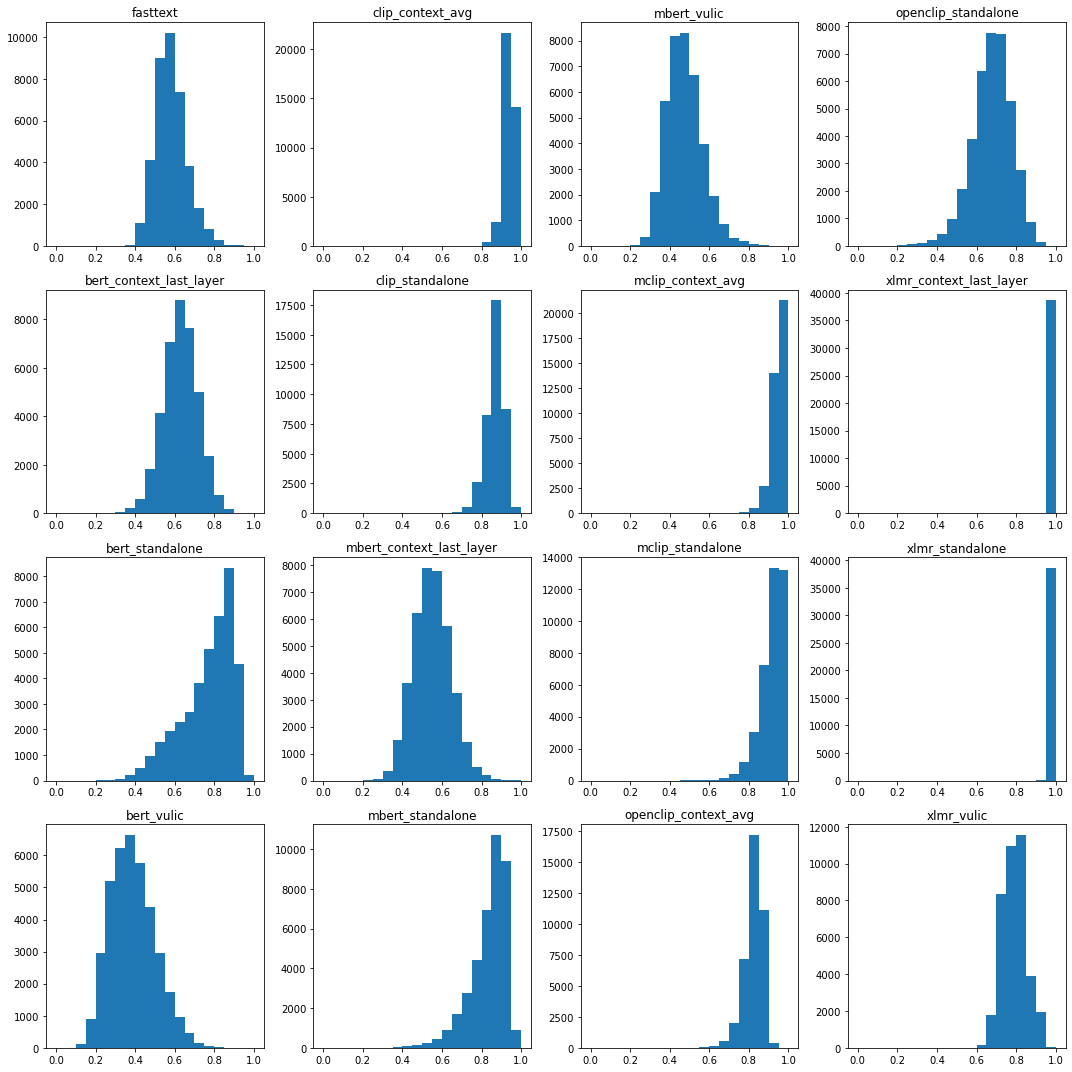

In [3]:
# compare similarities distributions visually

PER_ROW = 4

fig, axs = plt.subplots(PER_ROW,len(similarities)//PER_ROW)
fig.set_figheight(15)
fig.set_figwidth(15)

for idx,cs in enumerate(similarities):
    cx = idx%PER_ROW
    cy = (idx-cx)//PER_ROW
    axs[cx,cy].set_title(cs.split('.')[1])
    axs[cx,cy].hist(df[cs].tolist(), bins=20, range=[0,1])
    
for ax in axs.flat:
    ax.set(xlabel='', ylabel='')

fig.tight_layout()
plt.show()

In [4]:
# prepare data for analysis

import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

targets = []
for idx1, s1 in enumerate(similarities[:]):
    for s2 in similarities[:]:
        if s1==s2: continue
        ss1 = s1.replace('similarities.','')
        ss2 = s2.replace('similarities.','')
        hh = f'contrast.{ss1}/{ss2}'
        # print(hh, '<-', s1, '/', s2)
        df[hh] = df[s1]/df[s2]
        targets.append( hh )

sample = df[
             targets + real_factors + bool_factors
            ].dropna().copy()

for f in targets+real_factors:
    fn = f.replace('/','_').replace('.','_')
    sample[f'{fn}'] = sample[f]
    sample[f'{fn}_rank'] = sample.sort_values(by=[f,], ascending=False).reset_index().sort_values('index').index + 1
for f in bool_factors:
    fn = f.replace('/','_').replace('.','_')
    sample[f'{fn}'] = sample[f]

In [ ]:
# calculate the main report

_rank_fields = ['','','','word1_attrs_abstractness_rank','word2_attrs_abstractness_rank',
                'word1_count_rank','word2_count_rank']
    
res = []
for target in targets:
    print('target', target)
    
    # prepare heading of basic block
    tfn = target.replace('/','_').replace('.','_')+'_rank'
    res.extend( [['TARGET', tfn,], ['items', len(sample)], [], ['block:', 'basic',]] )
    res.append(_rank_fields + _rank_fields)
    line = ['','','mean'] +[sample[f].mean() for f in _rank_fields[3:]]
    res.append(line)
    res.append(['','r2a', 'Pr(>F)', 'pvals'])
    
    # calc basic block stats
    ft = _rank_fields[3:]
    basic_model = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    ft = ['word1_attrs_abstractness_rank','word2_attrs_abstractness_rank',False,False]
    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(fitted, basic_model, typ=1, test='F').items())[-1][-1].tolist())[-1]
    line1 = ['features:abstractness',fitted.rsquared_adj,test_score]
    line2 = ['\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, '') if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, '') if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)

    ft = [False,False,'word1_count_rank','word2_count_rank','']
    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(fitted, basic_model, typ=1, test='F').items())[-1][-1].tolist())[-1]
    line1 = ['features:count',fitted.rsquared_adj,test_score]
    line2 = ['\t']
    for f in ft:
        pval = fitted.pvalues.get(f, '') if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, '') if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)

    ft = _rank_fields[3:]
    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(fitted, basic_model, typ=1, test='F').items())[-1][-1].tolist())[-1]
    line1 = ['features:abstractness+count',fitted.rsquared_adj,test_score]
    line2 = ['\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, '') if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, '') if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)
    res.append([''])

    # calculate relations blocks
    for bn, block in [ ('wordnet_relations', block1) , ('conceptnet_relations', block2), ]:
        res.append( ['block:', bn,] )
        res.append( _rank_fields+[bf.replace('/','_').replace('.','_') for bf in block] )
        res[-1].extend( _rank_fields+[bf.replace('/','_').replace('.','_') for bf in block] )
        line = ['','','mean'] +[sample[f].mean() for f in _rank_fields[3:]+block]
        res.append(line)
        res.append(['','r2a', 'Pr(>F)', 'pvals'])
        ft = _rank_fields[3:]+[None for _ in block]
        fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
        test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, 
                                                      test='F').items())[-1][-1].tolist())[-1]

        line1 = ['features:basic',fitted.rsquared_adj,test_score]
        line2 = ['\t\t']
        for f in ft:
            pval = fitted.pvalues.get(f, '') if f else ""
            line1.append( pval )
            coef = fitted.params.get(f, '') if f else ""
            line2.append( coef )
        line1 += line2
        res.append(line1)
        fft = ft[:]

        for idx, bf in enumerate(block):
            bf = bf.replace('/','_').replace('.','_')
            ft = fft[:]
            ft[idx+4] = bf
            fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
            test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, 
                                                          test='F').items())[-1][-1].tolist())[-1]
            line1 = ['features:basic+'+bf,fitted.rsquared_adj,test_score]
            line2 = ['\t\t']
            for f in ft:
                pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
                line1.append( pval )
                coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
                line2.append( coef )
            line1 += line2
            res.append(line1)

        ft = fft[:]
        for idx, bf in enumerate(block):
            bf = bf.replace('/','_').replace('.','_')
            ft[idx+4] = bf
        fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
        test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, 
                                                      test='F').items())[-1][-1].tolist())[-1]
        line1 = ['features:basic+all_'+bn,fitted.rsquared_adj,test_score]
        line2 = ['\t\t']
        for f in ft:
            pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
            line1.append( pval )
            coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
            line2.append( coef )
        line1 += line2
        res.append(line1)
        
        ft = []
        for idx, bf in enumerate(block):
            bf = bf.replace('/','_').replace('.','_')
            ft.append( bf )
        fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
        test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, 
                                                      test='F').items())[-1][-1].tolist())[-1]
        line1 = ['features:all_'+bn,fitted.rsquared_adj,'','','','','']
        line2 = ['\t\t\t\t\t\t']
        for f in ft:
            pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
            line1.append( pval )
            coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
            line2.append( coef )
        line1 += line2
        res.append(line1)
        
        res.append([''])
        
    # calculate stats for supersenses block
    bn = 'supersenses'
    block = block3
    block3pairs = [ f[5:] for f in block[::2]]
    res.append( ['block:', bn,] )

    res.append( _rank_fields+[bf.replace('/','_').replace('.','_') for bf in block] )
    res[-1].extend( _rank_fields+[bf.replace('/','_').replace('.','_') for bf in block] )

    line = ['','','mean'] +[sample[f].mean() for f in _rank_fields[3:]+block]
    res.append(line)
    res.append(['','r2a', 'Pr(>F)', 'pvals'])

    ft = _rank_fields[3:]+[None for _ in block]
    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]

    line1 = ['features:basic',fitted.rsquared_adj,test_score]
    line2 = ['\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, '') if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, '') if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)
    fft = ft[:]

    for idx, bf in enumerate(block3pairs):
        bf = bf.replace('/','_').replace('.','_')
        bf1 = 'word1'+bf
        bf2 = 'word2'+bf
        ft = fft[:]
        ft[idx*2+4] = bf1
        ft[idx*2+4+1] = bf2
        fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
        test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]

        line1 = ['features:basic+'+bf[1:],fitted.rsquared_adj,test_score]
        line2 = ['\t\t']
        for f in ft:
            pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
            line1.append( pval )
            coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
            line2.append( coef )
        line1 += line2
        res.append(line1)

    ft = fft[:]
    for idx, bf in enumerate(block3pairs):
        bf = bf.replace('/','_').replace('.','_')
        bf1 = 'word1'+bf
        bf2 = 'word2'+bf
        ft[idx*2+4] = bf1
        ft[idx*2+4+1] = bf2
    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]
    line1 = ['features:basic+all_'+bn,fitted.rsquared_adj,test_score]
    line2 = ['\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)

    ft = []
    for idx, bf in enumerate(block):
        bf = bf.replace('/','_').replace('.','_')
        ft.append( bf )
        ft.append( bf.replace('word1', 'word2') )
    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]
    line1 = ['features:all_'+bn,fitted.rsquared_adj,'','','','','']
    line2 = ['\t\t\t\t\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)
    res.append([''])

    # calculate stats for vad block
    bn = 'vad'
    block = block4
    block3pairs = [ f[5:] for f in block[::2]]
    res.append( ['block:', bn,] )

    res.append( _rank_fields+[bf.replace('/','_').replace('.','_') for bf in block] )
    res[-1].extend( _rank_fields+[bf.replace('/','_').replace('.','_') for bf in block] )

    line = ['','','mean'] +[sample[f].mean() for f in _rank_fields[3:]+block]
    res.append(line)
    res.append(['','r2a', 'Pr(>F)', 'pvals'])

    ft = _rank_fields[3:]+[None for _ in block]
    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]

    line1 = ['features:basic',fitted.rsquared_adj,test_score]
    line2 = ['\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, '') if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, '') if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)
    fft = ft[:]

    for idx, bf in enumerate(block3pairs):
        bf = bf.replace('/','_').replace('.','_')
        bf1 = 'word1'+bf
        bf2 = 'word2'+bf
        ft = fft[:]
        ft[idx*2+4] = bf1
        ft[idx*2+4+1] = bf2
        fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
        test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]
        line1 = ['features:basic+'+bf[1:],fitted.rsquared_adj,test_score]
        line2 = ['\t\t']
        for f in ft:
            pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
            line1.append( pval )
            coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
            line2.append( coef )
        line1 += line2
        res.append(line1)

    ft = fft[:]
    for idx, bf in enumerate(block3pairs):
        bf = bf.replace('/','_').replace('.','_')
        bf1 = 'word1'+bf
        bf2 = 'word2'+bf
        ft[idx*2+4] = bf1
        ft[idx*2+4+1] = bf2

    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]
    line1 = ['features:basic+all_'+bn,fitted.rsquared_adj,test_score]
    line2 = ['\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)

    ft = []
    for idx, bf in enumerate(block):
        bf = bf.replace('/','_').replace('.','_')
        ft.append( bf )
        ft.append( bf.replace('word1', 'word2') )

    fitted = sm.ols(formula=tfn+' ~ '+'+'.join([f for f in ft if f]), data=sample).fit()
    test_score = np.array(list(sma.stats.anova_lm(basic_model, fitted, typ=1, test='F').items())[-1][-1].tolist())[-1]
    line1 = ['features:all_'+bn,fitted.rsquared_adj,'','','','','']
    line2 = ['\t\t\t\t\t\t']
    for f in ft:
        pval = fitted.pvalues.get(f, fitted.pvalues.get(f+'[T.True]','')) if f else ""
        line1.append( pval )
        coef = fitted.params.get(f, fitted.params.get(f+'[T.True]','')) if f else ""
        line2.append( coef )
    line1 += line2
    res.append(line1)        

    res.append([''])        
    res.append([''])
    
with open('report.tsv', 'w', encoding='utf-8') as ofh:
    for line in res:
        print("\t".join(map(str,line)).replace('.',','), file=ofh)
        

In [15]:
embs = ["fasttext", "bert_context_last_layer", "bert_standalone", "bert_vulic", "mbert_context_last_layer", 
        "mbert_standalone", "mbert_vulic", "xlmr_context_last_layer", "xlmr_standalone", "xlmr_vulic", 
        "clip_context_avg", "clip_standalone", "mclip_context_avg", "mclip_standalone", "openclip_context_avg", 
        "openclip_standalone"]

heads = [
    'features:abstractness', 'features:count', 'features:abstractness+count', 
    'features:basic+relations_wordnet_flag_antonyms', 'features:basic+relations_wordnet_flag_synonyms', 
    'features:basic+relations_wordnet_flag_same_hyponyms','features:basic+relations_wordnet_flag_same_hypernyms', 
    'features:basic+relations_wordnet_flag_hyponyms', 'features:basic+relations_wordnet_flag_hypernyms', 
    'features:basic+all_wordnet_relations', 'features:all_wordnet_relations', 'features:all_vad', 
    'features:basic+all_vad', 'features:basic+all_supersenses', 'features:all_supersenses', 
    'features:basic+all_conceptnet_relations', 'features:all_conceptnet_relations'
]


res = defaultdict(lambda:defaultdict(float))

for line in open('report.tsv', encoding='utf-8'):
    chunks = line.rstrip('\n').rstrip('\t').split('\t')
    if not(len(chunks)>1 or chunks and chunks[0]):
        continue

    # skip until target is the contrast btw two of embeddings from embs
    if chunks[0]=='TARGET':
        target = chunks[1].replace('contrast_','')
        emb1, emb2 = None, None
        for emb in embs:
            if target.startswith(emb):
                emb2 = target[len(emb)+1:-5]
                if emb2 not in embs:
                    continue
                emb1 = emb
    # store features
    elif 'features:' in chunks[0] and chunks[0] in heads:
        v = float(chunks[1].replace(',','.'))
        res[chunks[0]][(emb1,emb2)] = v

with open('pivot.tsv', 'w', encoding='utf-8') as ofh:
    for q in res:
        print(f'{q}', file=ofh)
        print('\t'+'\t'.join(embs), file=ofh)
        for h in embs:
            r = [h]
            for h2 in embs:
                r.append( str(res[q].get((h,h2),'-')).replace('.',','))
            print('\t'.join(r), file=ofh)


In [18]:
def m_group(s):
    return 'multimodal' if 'clip' in s else 'text'
    
state = None
headers = None
for line in open('pivot.tsv', encoding='utf-8'):
    chunks = line.replace(',','.').rstrip().split('\t')
    
    if len(chunks)==1:
        state = chunks[0]
    else:
        # read headers
        if headers is None:
            headers = chunks[1:]
            r_idx = 0
        # skip headers if we already have them
        elif not chunks[0]:
            r_idx = 0
        # process one row and calculate score
        else:
            scores =  [(float(chunks[c_idx+1]), m_group(headers[c_idx])) for c_idx in range(len(headers)) if c_idx != r_idx]
            current = m_group( headers[r_idx] )
            g1t, g2t = 'text', 'multimodal'
            g1v = [a for a,b in scores if b=='text']
            g2v = [a for a,b in scores if b=='multimodal']
            print(f"{state}\t{headers[r_idx]}\t{current}\t{g1t} mean({np.mean(g1v)}) "
                  f"<> {g2t} mean({np.mean(g2v)})\tdiff\t{np.mean(g1v)-np.mean(g2v)}"
                  f"\tpval\t{ttest_ind(g1v, g2v)[1]}")
            r_idx += 1
            



features:abstractness	fasttext	text	text mean(0.01931040430801208) <> multimodal mean(0.08680222162228847)	diff	-0.06749181731427639	pval	0.0017200157793625455
features:abstractness	bert_context_last_layer	text	text mean(0.016994587132316323) <> multimodal mean(0.03033629928055187)	diff	-0.013341712148235547	pval	0.25005295983307346
features:abstractness	bert_standalone	text	text mean(0.010331478373409518) <> multimodal mean(0.055711081968317054)	diff	-0.04537960359490754	pval	0.00216646408729974
features:abstractness	bert_vulic	text	text mean(0.02734862289357772) <> multimodal mean(0.05464637295667418)	diff	-0.027297750063096465	pval	0.01393250988801493
features:abstractness	mbert_context_last_layer	text	text mean(0.013672259120819338) <> multimodal mean(0.05563712256259801)	diff	-0.04196486344177867	pval	0.0039059798531420995
features:abstractness	mbert_standalone	text	text mean(0.015311716594113864) <> multimodal mean(0.1172274664100919)	diff	-0.10191574981597804	pval	0.000929441199

features:all_supersenses	mclip_standalone	multimodal	text mean(0.163032707534655) <> multimodal mean(0.12161786875573843)	diff	0.04141483877891658	pval	0.2897895373803236
features:all_supersenses	openclip_context_avg	multimodal	text mean(0.09569205364493549) <> multimodal mean(0.06546039688210711)	diff	0.03023165676282838	pval	0.17862676495999716
features:all_supersenses	openclip_standalone	multimodal	text mean(0.052128134694539564) <> multimodal mean(0.10425688589132094)	diff	-0.05212875119678138	pval	0.003804012392967575
features:basic+all_vad	fasttext	text	text mean(0.10642419967557923) <> multimodal mean(0.11732698157104365)	diff	-0.010902781895464425	pval	0.7210346265861862
features:basic+all_vad	bert_context_last_layer	text	text mean(0.09835075517887289) <> multimodal mean(0.06509962929547485)	diff	0.03325112588339804	pval	0.19490968963302951
features:basic+all_vad	bert_standalone	text	text mean(0.13676791401983046) <> multimodal mean(0.20969031255276716)	diff	-0.0729223985329367

In [19]:
data={}
contrasts=set()
with open("report.tsv",'r') as concfile:
    read_csv = csv.reader(concfile, delimiter='\t')
    for row in read_csv:
        # print(row)
        if not row: 
            continue
        if row[0]=="TARGET": 
            contrast=row[1]
            contrasts.add(contrast)
        if row[0][:9]=="features:": 
            features=row[0][9:]
            data[(contrast,features)]=float(row[1].replace(',',"."))
features = list(set([x[1] for x in data.keys()]))
complex_features = [x for x in features if x.startswith('basic+')]

In [20]:
textembeddings = set(["fasttext","bert_context_last_layer","bert_standalone",
"bert_vulic","mbert_context_last_layer","mbert_standalone",
"mbert_vulic","xlmr_context_last_layer","xlmr_standalone","xlmr_vulic"])

multiembeddings=set(["clip_context_avg","clip_standalone","mclip_context_avg",
"mclip_standalone","openclip_context_avg","openclip_standalone"])

all_embeddings=multiembeddings.union(textembeddings)

def contrastname(e1,e2): return "contrast_"+e1+"_"+e2+"_rank"

def text_contrasts(emb,features):
    values=[]
    for e2 in textembeddings:
        if e2 !=emb: values.append((e2, data[(contrastname(emb,e2),features)]))
    return values

def multi_contrasts(emb,features):
    values=[]
    for e2 in multiembeddings:
        if e2 !=emb: values.append((e2, data[(contrastname(emb,e2),features)]))
    return values

candidate_contrasts=set([contrastname(e1,e2) for e1 in all_embeddings for e2 in all_embeddings])

per_feature = dict()
for f in features:
    per_feature[f] = {'text vs text': [], 'text vs multimodal': []}
    for text_emb in textembeddings:
        t = [x[1] for x in text_contrasts(text_emb, f)]
        m = [x[1] for x in multi_contrasts(text_emb, f)]
        if f in complex_features:
            t_base = [x[1] for x in text_contrasts(text_emb, 'basic')]
            t = [x[0]-x[1] for x in list(zip(t,t_base))]
            m_base = [x[1] for x in multi_contrasts(text_emb, 'basic')]
            m = [x[0]-x[1] for x in list(zip(m,m_base))]
        per_feature[f]['text vs text'].extend(t)
        per_feature[f]['text vs multimodal'].extend(m)

[Text(1, 0, 'text vs text'), Text(2, 0, 'text vs multimodal')]

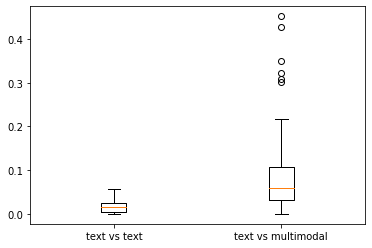

In [21]:
fig, ax = plt.subplots()
ax.boxplot(per_feature['abstractness'].values())
ax.set_xticklabels(per_feature['abstractness'].keys())

basic+relations_wordnet_flag_hyponyms


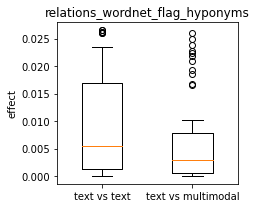


all_supersenses


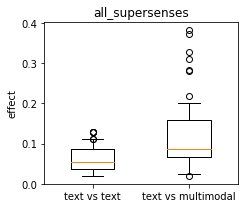


abstractness


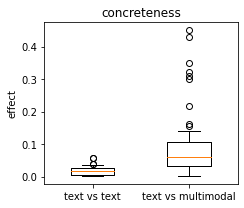


basic+attrs_supersenses_is_process


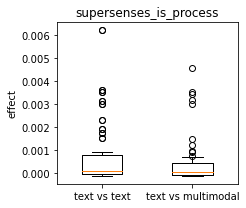


basic+attrs_supersenses_is_time


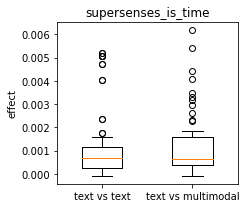


basic+attrs_supersenses_is_shape


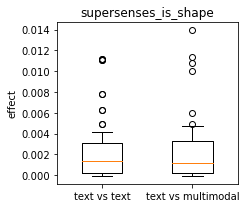


basic+attrs_supersenses_is_artifact


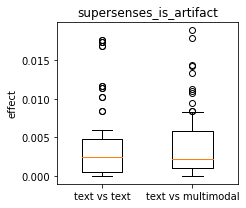


basic+relations_conceptnet_flag_IsA


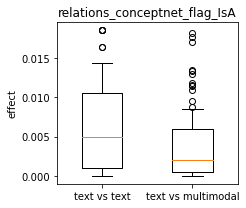


basic+attrs_supersenses_is_attribute


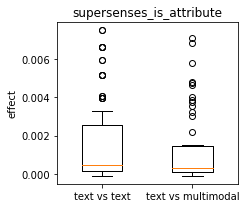


basic+relations_conceptnet_flag_FormOf


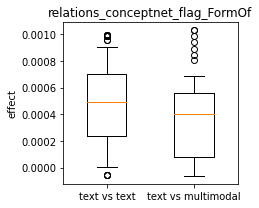


basic+relations_conceptnet_flag_SimilarTo


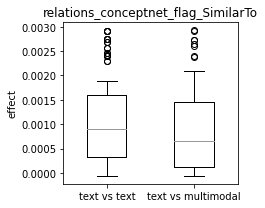


basic+attrs_supersenses_is_location


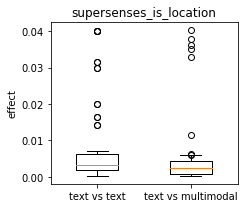


basic+attrs_supersenses_is_relation


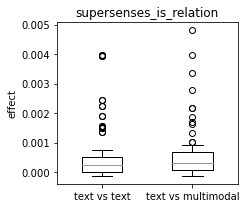


basic+attrs_supersenses_is_motive


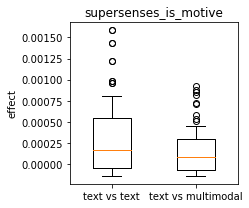


basic+relations_wordnet_flag_synonyms


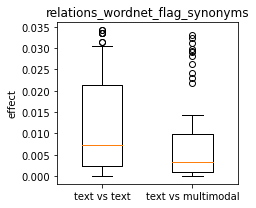


basic+attrs_supersenses_is_body


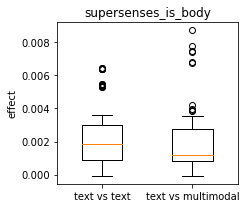


basic+attrs_supersenses_is_object


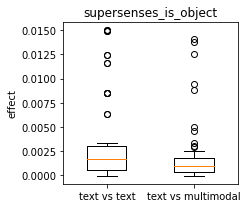


basic+attrs_supersenses_is_phenomenon


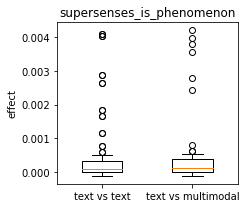


basic+attrs_supersenses_is_feeling


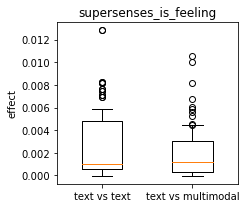


basic+all_vad


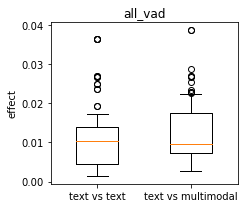


basic+attrs_supersenses_is_animal


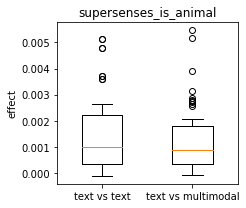


basic+relations_wordnet_flag_same_hyponyms


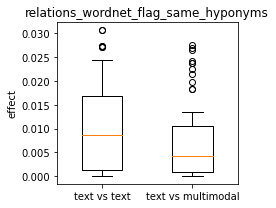


basic+relations_conceptnet_flag_Synonym


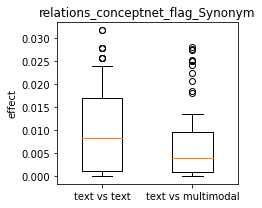


all_conceptnet_relations


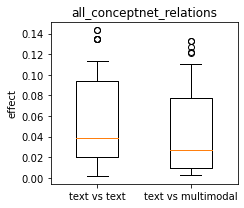


basic+attrs_vad_a


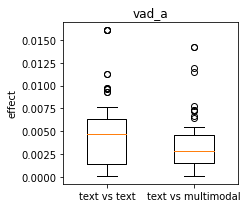


basic+attrs_supersenses_is_act


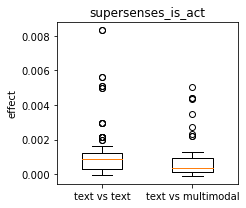


all_vad


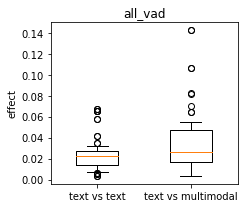


basic+attrs_supersenses_is_person


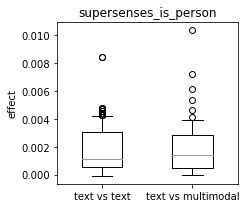


basic+attrs_supersenses_is_Tops


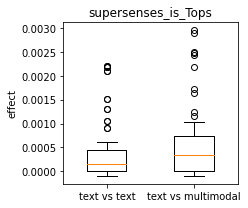


basic+relations_conceptnet_flag_RelatedTo


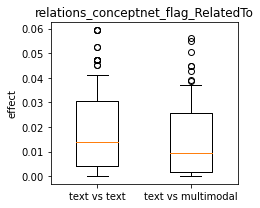


count


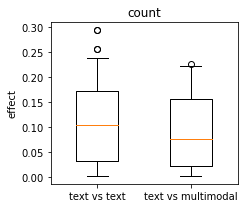


basic+attrs_supersenses_is_food


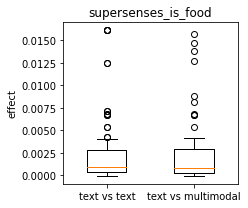


basic+relations_conceptnet_flag_DerivedFrom


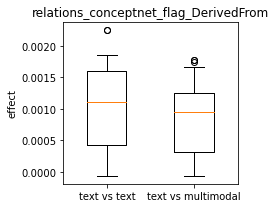


basic+attrs_supersenses_is_quantity


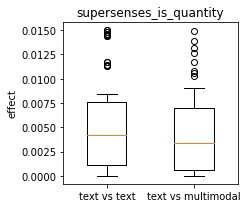


basic+attrs_supersenses_is_plant


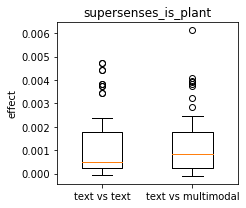


basic+attrs_vad_d


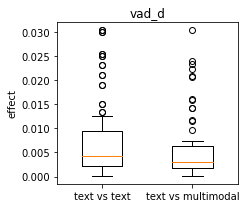


basic+attrs_supersenses_is_cognition


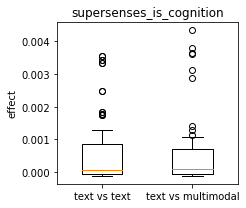


basic+attrs_supersenses_is_group


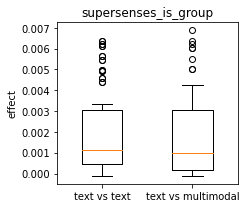


basic+attrs_supersenses_is_possession


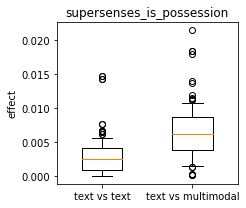


basic+all_wordnet_relations


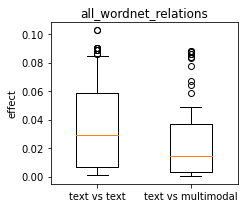


basic+attrs_vad_v


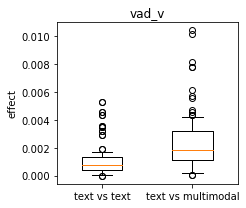


basic+relations_wordnet_flag_hypernyms


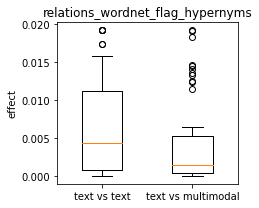


all_wordnet_relations


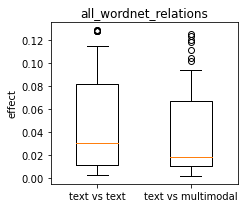


basic+relations_conceptnet_flag_AtLocation


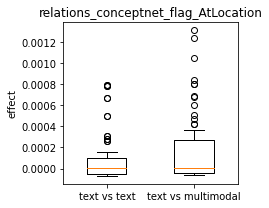


basic+all_supersenses


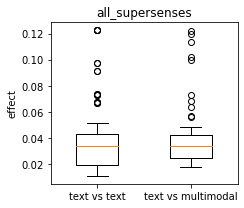


basic+attrs_supersenses_is_state


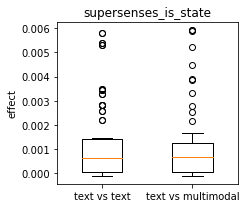


basic+relations_wordnet_flag_antonyms


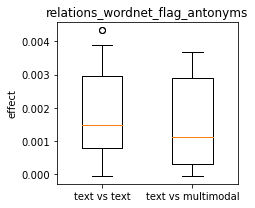


basic+relations_conceptnet_flag_Antonym


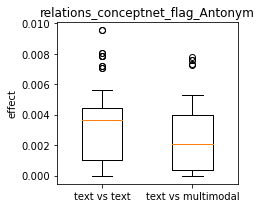


basic+relations_conceptnet_flag_DistinctFrom


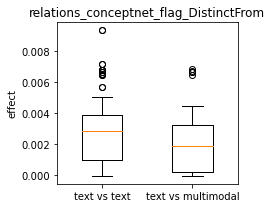


basic


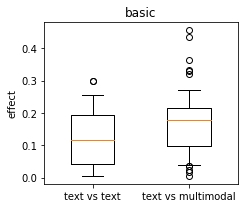


basic+relations_wordnet_flag_same_hypernyms


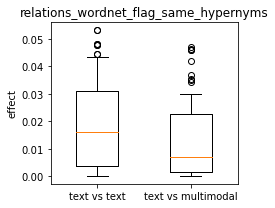


basic+all_conceptnet_relations


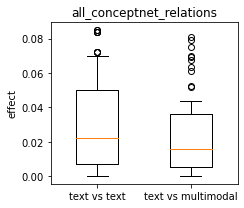


basic+attrs_supersenses_is_event


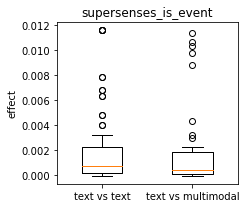


basic+relations_conceptnet_flag_PartOf


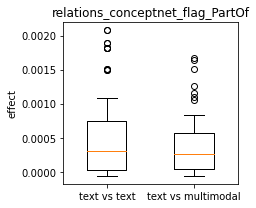


basic+attrs_supersenses_is_communication


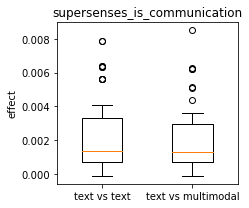


basic+attrs_supersenses_is_substance


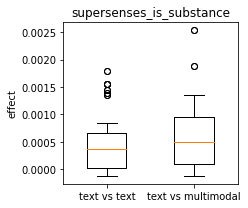


abstractness+count


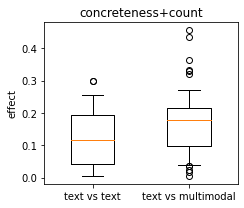

In [25]:
for f in per_feature:
#     if 'supersenses' not in f: continue
    print(f)
    fig, ax = plt.subplots(figsize=(3.5, 3))
    ax.boxplot(per_feature[f].values(),False, vert=True, whis=0.5, widths=[0.45]*len(per_feature[f]))    
    ax.set_xticklabels(per_feature[f].keys())
    plt.title(f.replace('basic+', '').replace('attrs_','').replace('abstractness','concreteness'))
    plt.ylabel('effect')
    #plt. margins(x=0)
    #ax.margins(x=0)
    plt.tight_layout() 
    plt.show()
    print()